In [1]:
import numpy as np
from elo import Bot, Referee, EloRanker

In [6]:
lengths = np.arange(0,40,5)

In [7]:
#bot_elos = np.zeros((len(bots), len(lengths)))
bot_elos = []
for i, length in enumerate(lengths):
    bots = [
        Bot('GPT3', 'answers/rakuda_koukou_v0/gpt3.jsonl'),
        Bot('Rinna 3.6B', 'answers/rakuda_koukou_v0/rinna-gpt-neox-3.6b.jsonl'),
        Bot('Llama Retoken', 'answers/rakuda_koukou_v0/llama_retoken_alpaca_gpt4.jsonl'),
        Bot('GPT4 Alpaca', 'answers/rakuda_koukou_v0/gpt4alpaca.jsonl')
    ]

    referee = Referee('matchups/rakuda_koukou_v0.jsonl',
                      'prompts/rakuda_reviewer.jsonl',
                      'prompts/rakuda_prompt_threeclass.jsonl',
                      max_tokens=1024,
                      model='gpt-3.5-turbo-0301')

    ranker = EloRanker(bots, 'questions/rakuda_koukou_v0.jsonl', referee)
    
    ranker.run_tournament(length)
    
    bot_elos.append([(bot.num_matches, bot.elo) for bot in bots])
    
    

In [8]:
bot_elos

[[(0, 1000), (0, 1000), (0, 1000)],
 [(5, 1005.6224092421295), (5, 994.3775907578705), (0, 1000)],
 [(10, 1023.7259516374985), (10, 976.2740483625015), (0, 1000)],
 [(14, 1072.2020498741333), (15, 947.0759243603502), (1, 980.7220257655166)],
 [(17, 1076.0877282776266), (17, 964.3751757657003), (6, 959.5370959566732)],
 [(18, 1086.9130405571764), (21, 932.5524762233458), (11, 980.534483219478)],
 [(22, 1128.7412884559562), (22, 918.7481877658153), (16, 952.5105237782288)],
 [(24, 1144.599851091801), (25, 950.4672707236274), (21, 904.932878184572)]]

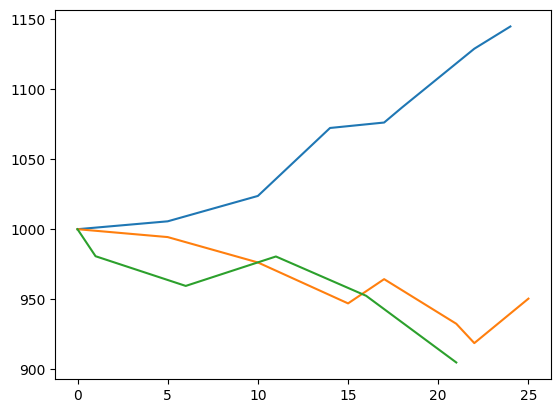

In [9]:
import matplotlib.pyplot as plt 
plt.plot
plt.plot(np.array(bot_elos)[:,:,0], np.array(bot_elos)[:,:,1])